# EDA on malware dataset from kaggle
    -kaggle dataset link: https://www.kaggle.com/datasets/dscclass/malware/data

In [11]:
!pip install kagglehub

In [12]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("dscclass/malware")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\az\.cache\kagglehub\datasets\dscclass\malware\versions\1


In [19]:
# import libraries for EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
#load the dataset
df = pd.read_csv('dataset/malware.csv')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138047 entries, 0 to 138046
Data columns (total 1 columns):
 #   Column                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

In [22]:
# data is single column and is separated by | lets work on that. and split data into multiple comumns.

# Split the single column into multiple columns based on the '|' delimiter
df_split = df.iloc[:,0].str.split("|", expand=True)

In [24]:
df_split.head()

,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,55,56
0,memtest.exe,631ea355665f28d4707448e442fbf5b8,332,224,258,9,0,361984,115712,0,...,4,3.26282271103,2.56884382364,3.53793936419,8797.0,216,18032,0,16,1
1,ose.exe,9d10f99a6712e28f8acd5641e3a7ea6b,332,224,3330,9,0,130560,19968,0,...,2,4.2504605579,3.42074425303,5.08017686277,837.0,518,1156,72,18,1
2,setup.exe,4d92f518527353c0db88a70fddcfd390,332,224,3330,9,0,517120,621568,0,...,11,4.42632398773,2.84644858861,5.27181275925,31102.2727273,104,270376,72,18,1
3,DW20.EXE,a41e524f8d45f0074fd07805ff0c9b12,332,224,258,9,0,585728,369152,0,...,10,4.36429082616,2.66931388802,6.40071950185,1457.0,90,4264,72,18,1
4,dwtrig20.exe,c87e561258f2f8650cef999bf643a731,332,224,258,9,0,294912,247296,0,...,2,4.30610018148,3.42159769887,5.19060266409,1074.5,849,1300,72,18,1


In [25]:
# Assign column names to the new DataFrame
my_columns= [
    "Name",
    "MD5",
    "Machine",
    "SizeOfOptionalHeader",
    "Characteristics",
    "MajorLinkerVersion",
    "MinorLinkerVersion",
    "SizeOfCode",
    "SizeOfInitializedData",
    "SizeOfUninitializedData",
    "AddressOfEntryPoint",
    "BaseOfCode",
    "BaseOfData",
    "ImageBase",
    "SectionAlignment",
    "FileAlignment",
    "MajorOperatingSystemVersion",
    "MinorOperatingSystemVersion",
    "MajorImageVersion",
    "MinorImageVersion",
    "MajorSubsystemVersion",
    "MinorSubsystemVersion",
    "SizeOfImage",
    "SizeOfHeaders",
    "CheckSum",
    "Subsystem",
    "DllCharacteristics",
    "SizeOfStackReserve",
    "SizeOfStackCommit",
    "SizeOfHeapReserve",
    "SizeOfHeapCommit",
    "LoaderFlags",
    "NumberOfRvaAndSizes",
    "SectionsNb",
    "SectionsMeanEntropy",
    "SectionsMinEntropy",
    "SectionsMaxEntropy",
    "SectionsMeanRawsize",
    "SectionsMinRawsize",
    "SectionMaxRawsize",
    "SectionsMeanVirtualsize",
    "SectionsMinVirtualsize",
    "SectionMaxVirtualsize",
    "ImportsNbDLL",
    "ImportsNb",
    "ImportsNbOrdinal",
    "ExportNb",
    "ResourcesNb",
    "ResourcesMeanEntropy",
    "ResourcesMinEntropy",
    "ResourcesMaxEntropy",
    "ResourcesMeanSize",
    "ResourcesMinSize",
    "ResourcesMaxSize",
    "LoadConfigurationSize",
    "VersionInformationSize",
    "Legitimate",
]

In [26]:
len(my_columns)

57

In [27]:
df_split.columns = my_columns

In [31]:
df_split.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138047 entries, 0 to 138046
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   Name                         138047 non-null  object
 1   MD5                          138047 non-null  object
 2   Machine                      138047 non-null  object
 3   SizeOfOptionalHeader         138047 non-null  object
 4   Characteristics              138047 non-null  object
 5   MajorLinkerVersion           138047 non-null  object
 6   MinorLinkerVersion           138047 non-null  object
 7   SizeOfCode                   138047 non-null  object
 8   SizeOfInitializedData        138047 non-null  object
 9   SizeOfUninitializedData      138047 non-null  object
 10  AddressOfEntryPoint          138047 non-null  object
 11  BaseOfCode                   138047 non-null  object
 12  BaseOfData                   138047 non-null  object
 13  ImageBase     

In [33]:
df_split.head()

,Name,MD5,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,...,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,Legitimate
0,memtest.exe,631ea355665f28d4707448e442fbf5b8,332,224,258,9,0,361984,115712,0,...,4,3.26282271103,2.56884382364,3.53793936419,8797.0,216,18032,0,16,1
1,ose.exe,9d10f99a6712e28f8acd5641e3a7ea6b,332,224,3330,9,0,130560,19968,0,...,2,4.2504605579,3.42074425303,5.08017686277,837.0,518,1156,72,18,1
2,setup.exe,4d92f518527353c0db88a70fddcfd390,332,224,3330,9,0,517120,621568,0,...,11,4.42632398773,2.84644858861,5.27181275925,31102.2727273,104,270376,72,18,1
3,DW20.EXE,a41e524f8d45f0074fd07805ff0c9b12,332,224,258,9,0,585728,369152,0,...,10,4.36429082616,2.66931388802,6.40071950185,1457.0,90,4264,72,18,1
4,dwtrig20.exe,c87e561258f2f8650cef999bf643a731,332,224,258,9,0,294912,247296,0,...,2,4.30610018148,3.42159769887,5.19060266409,1074.5,849,1300,72,18,1


In [35]:
# now that I successsfully split the data into multiple columns. i should save it to a new file.

df_split.to_csv("dataset/update_malware.csv", index=False)

In [37]:
# lets load the updated dataset
df = pd.read_csv("dataset/update_malware.csv")


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138047 entries, 0 to 138046
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Name                         138047 non-null  object 
 1   MD5                          138047 non-null  object 
 2   Machine                      138047 non-null  int64  
 3   SizeOfOptionalHeader         138047 non-null  int64  
 4   Characteristics              138047 non-null  int64  
 5   MajorLinkerVersion           138047 non-null  int64  
 6   MinorLinkerVersion           138047 non-null  int64  
 7   SizeOfCode                   138047 non-null  int64  
 8   SizeOfInitializedData        138047 non-null  int64  
 9   SizeOfUninitializedData      138047 non-null  int64  
 10  AddressOfEntryPoint          138047 non-null  int64  
 11  BaseOfCode                   138047 non-null  int64  
 12  BaseOfData                   138047 non-null  int64  
 13 

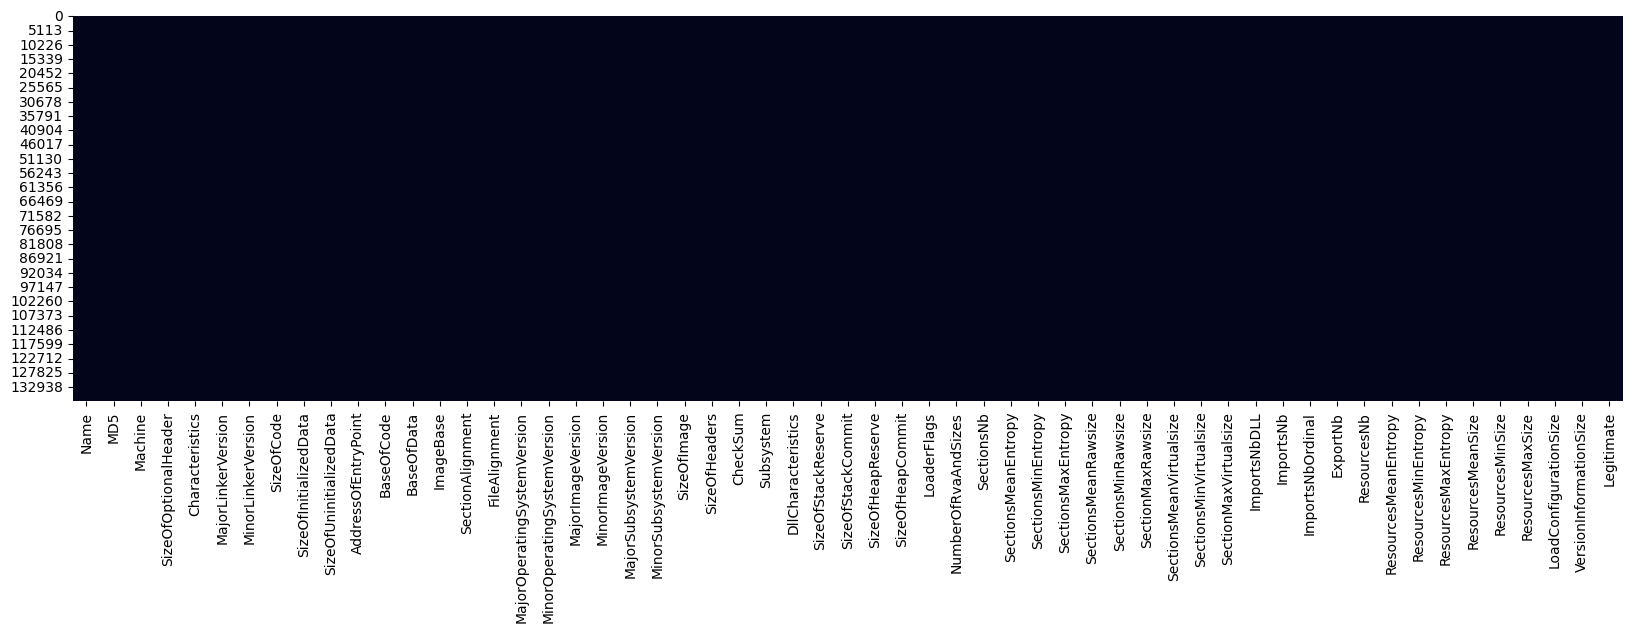

In [ ]:
# checking for missing date
plt.figure(figsize=(20, 5))
sns.heatmap(df.isnull(), cbar=False)

plt.show()

In [42]:
df.isnull().sum().sort_values(ascending=False)

Name                           0
MD5                            0
Machine                        0
SizeOfOptionalHeader           0
Characteristics                0
MajorLinkerVersion             0
MinorLinkerVersion             0
SizeOfCode                     0
SizeOfInitializedData          0
SizeOfUninitializedData        0
AddressOfEntryPoint            0
BaseOfCode                     0
BaseOfData                     0
ImageBase                      0
SectionAlignment               0
FileAlignment                  0
MajorOperatingSystemVersion    0
MinorOperatingSystemVersion    0
MajorImageVersion              0
MinorImageVersion              0
MajorSubsystemVersion          0
MinorSubsystemVersion          0
SizeOfImage                    0
SizeOfHeaders                  0
CheckSum                       0
Subsystem                      0
DllCharacteristics             0
SizeOfStackReserve             0
SizeOfStackCommit              0
SizeOfHeapReserve              0
SizeOfHeap

# Univariate Analysis
- Understand the distribution of each feature.
- For numerical columns, you can use histograms and boxplots.
- For categorical columns, bar plots are helpful.

<function matplotlib.pyplot.show(close=None, block=None)>

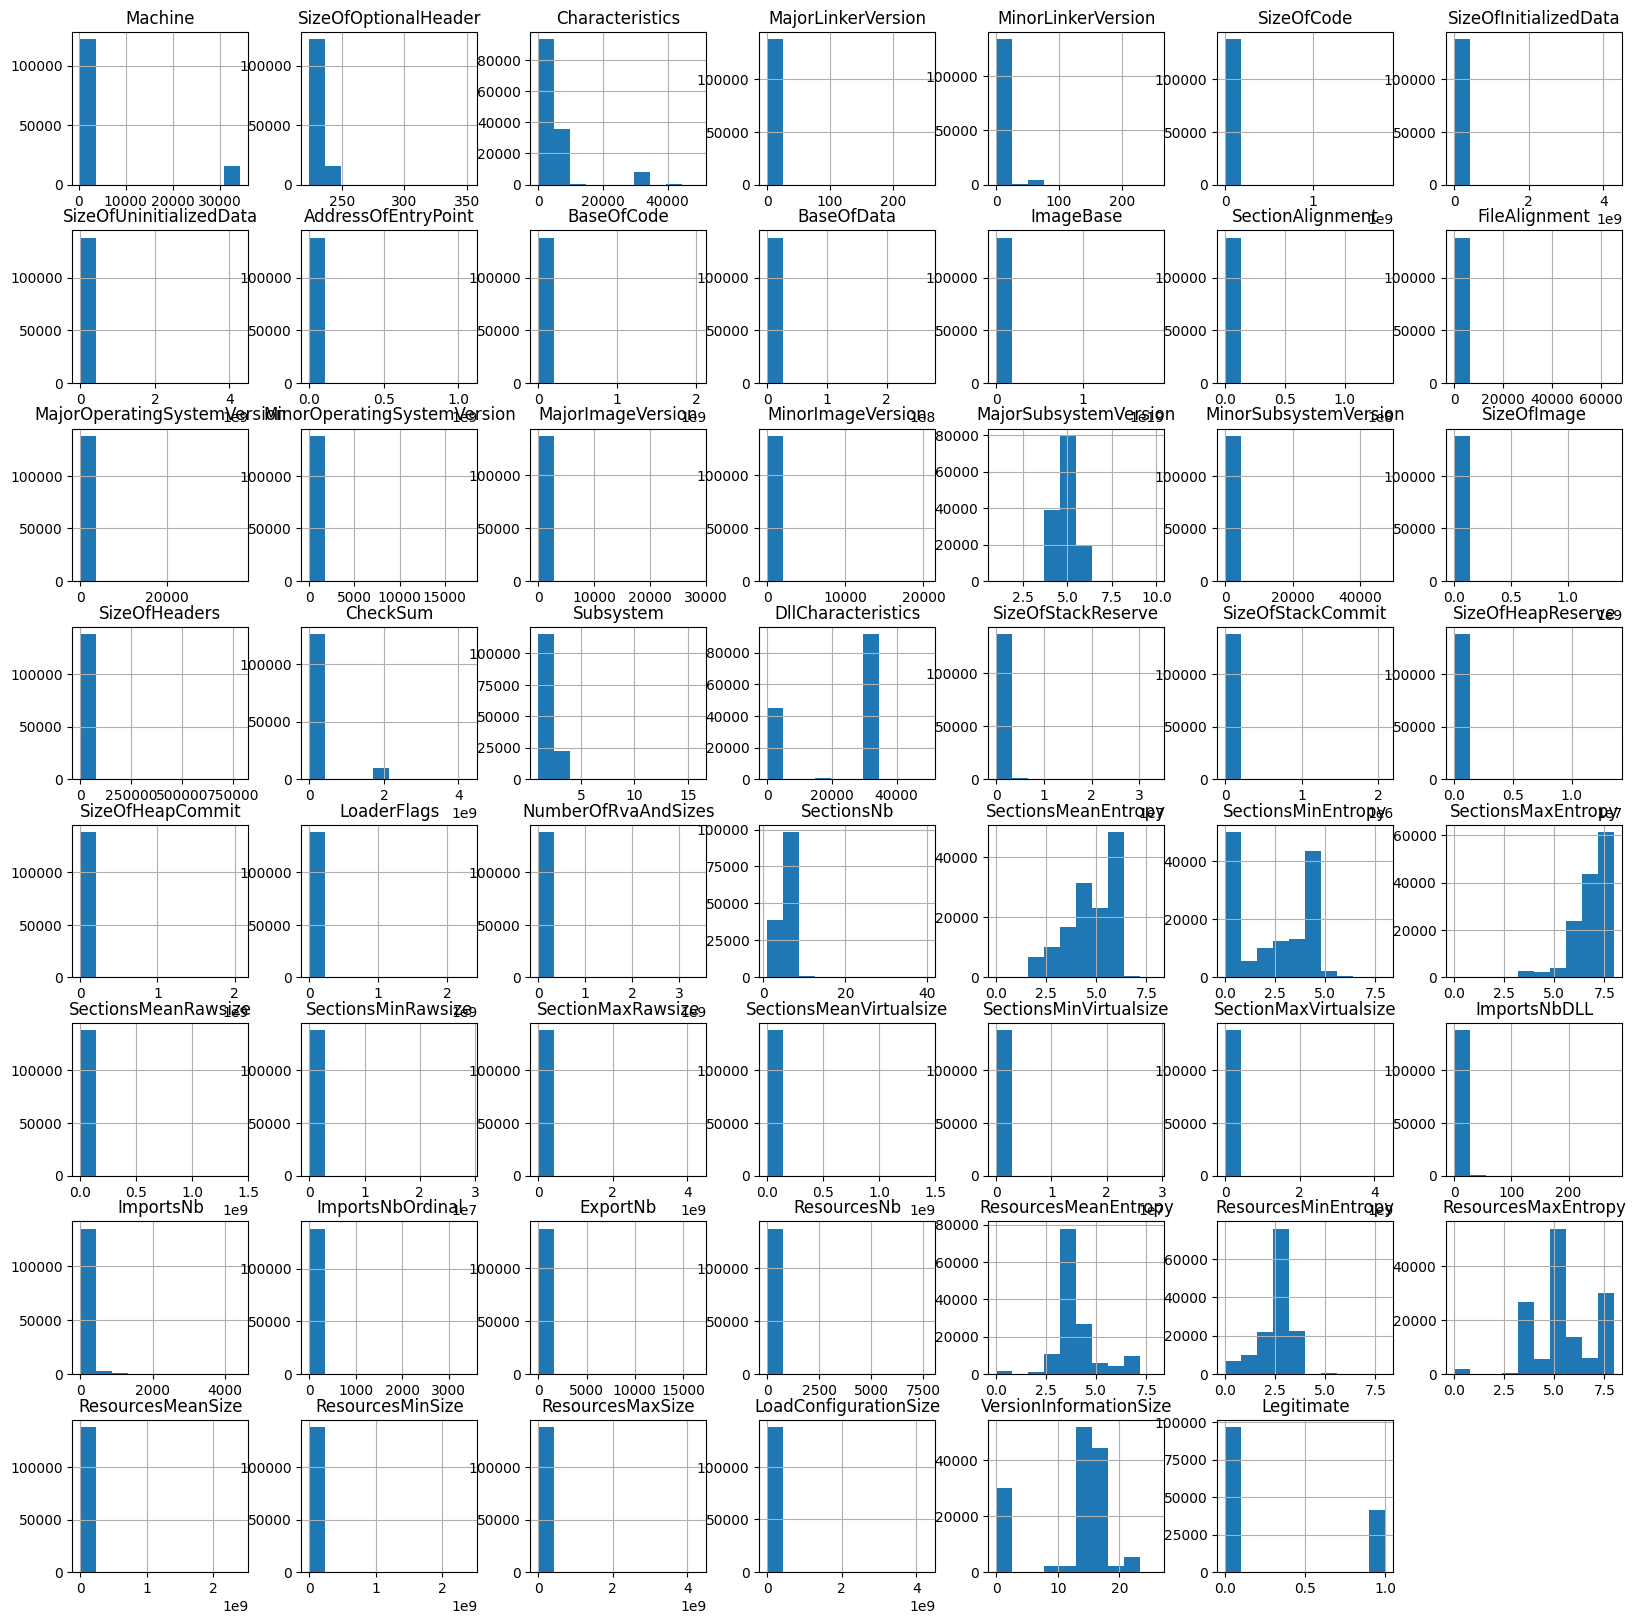

In [44]:
df.hist(figsize=(20,20))
plt.show

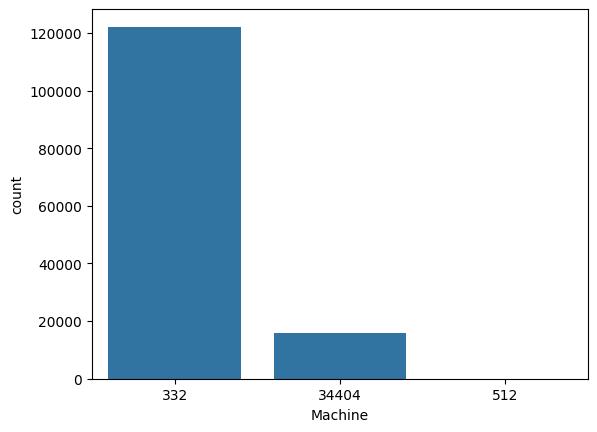

In [47]:
# Plot bar plot for categorical columns (example for Machine)
sns.countplot(data=df_split, x="Machine")
plt.show()

In [ ]:
df.info(5)

# Outlier Detection

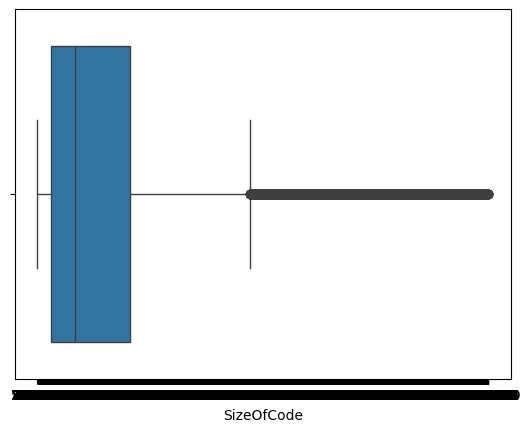

TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [50]:
sns.boxplot(data=df_split, x="SizeOfCode")
plt.show()

# Z-score method for outlier detection
from scipy import stats

z_scores = stats.zscore(df_split[["SizeOfCode"]])
df_split_outliers = df_split[(z_scores > 3) | (z_scores < -3)]
print(df_split_outliers)

In [51]:
print(df_split["SizeOfCode"].dtype)

object


In [52]:
df_split["SizeOfCode"] = pd.to_numeric(df_split["SizeOfCode"], errors="coerce")

In [53]:
print(df_split["SizeOfCode"].isnull().sum())

0


In [54]:
z_scores = stats.zscore(df_split[["SizeOfCode"]])
df_split_outliers = df_split[(z_scores > 3) | (z_scores < -3)]
print(df_split_outliers)

                                               Name  \
136                                       Skype.exe   
8068                                      EXCEL.EXE   
8069                                   excelcnv.exe   
9410                                  msmdlocal.dll   
9782                                     chrome.dll   
...                                             ...   
72071   VirusShare_9a0a78dc7a7189b7e3249538bb62ddea   
83534   VirusShare_ba069ca9f1330d4eb467ed2d989c245f   
93606   VirusShare_da47820a19019e9bba266a836495011b   
99107   VirusShare_7a7ed710a0cefd694f0c513fdaaf8473   
131647  VirusShare_c26b6a7f97ee8133177010c8cacefbd0   

                                     MD5 Machine SizeOfOptionalHeader  \
136     5cbc122dd419711cae36d8ef88a5bc09     332                  224   
8068    a32a38067dffb745658bf34aa8e3025c   34404                  240   
8069    f0802321874c1c3b118dcb6c1c098875   34404                  240   
9410    2935c55d84ce05c8d2647e9cb274f488   3440

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138047 entries, 0 to 138046
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Name                         138047 non-null  object 
 1   MD5                          138047 non-null  object 
 2   Machine                      138047 non-null  int64  
 3   SizeOfOptionalHeader         138047 non-null  int64  
 4   Characteristics              138047 non-null  int64  
 5   MajorLinkerVersion           138047 non-null  int64  
 6   MinorLinkerVersion           138047 non-null  int64  
 7   SizeOfCode                   138047 non-null  int64  
 8   SizeOfInitializedData        138047 non-null  int64  
 9   SizeOfUninitializedData      138047 non-null  int64  
 10  AddressOfEntryPoint          138047 non-null  int64  
 11  BaseOfCode                   138047 non-null  int64  
 12  BaseOfData                   138047 non-null  int64  
 13 